## Patinaj pe CartPole

> **Problemă**: Dacă Peter vrea să scape de lup, trebuie să se poată mișca mai repede decât acesta. Vom vedea cum Peter poate învăța să patineze, în special să își mențină echilibrul, folosind Q-Learning.

Mai întâi, să instalăm gym și să importăm bibliotecile necesare:


In [1]:
#code block 1

## Creează un mediu cartpole


In [ ]:
#code block 2

Pentru a vedea cum funcționează mediul, să rulăm o scurtă simulare pentru 100 de pași.


In [ ]:
#code block 3

În timpul simulării, trebuie să obținem observații pentru a decide cum să acționăm. De fapt, funcția `step` ne returnează observațiile curente, funcția de recompensă și indicatorul `done`, care arată dacă are sens să continuăm simularea sau nu:


In [ ]:
#code block 4

Putem obține valoarea minimă și maximă a acelor numere:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Să explorăm și o altă metodă de discretizare folosind intervale:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Să rulăm acum o scurtă simulare și să observăm acele valori discrete ale mediului.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


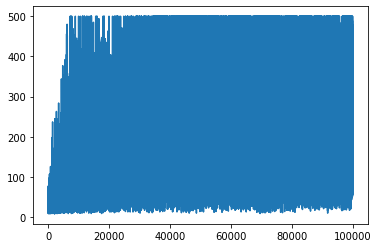

In [20]:
plt.plot(rewards)

Din acest grafic, nu este posibil să se determine nimic, deoarece, datorită naturii procesului de antrenare stocastic, durata sesiunilor de antrenament variază foarte mult. Pentru a înțelege mai bine acest grafic, putem calcula **media mobilă** pe o serie de experimente, să zicem 100. Acest lucru poate fi realizat convenabil folosind `np.convolve`:


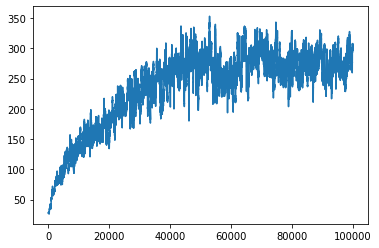

In [22]:
#code block 12

## Variarea hiperparametrilor și observarea rezultatului în acțiune

Acum ar fi interesant să vedem cum se comportă modelul antrenat. Să rulăm simularea și vom urma aceeași strategie de selecție a acțiunilor ca în timpul antrenamentului: eșantionarea conform distribuției de probabilitate din Q-Table:


In [23]:
# code block 13

## Salvarea rezultatului într-un GIF animat

Dacă vrei să-ți impresionezi prietenii, ai putea să le trimiți imaginea GIF animată a balansului cu bara. Pentru a face acest lucru, putem apela `env.render` pentru a produce un cadru de imagine, iar apoi să salvăm aceste cadre într-un GIF animat folosind biblioteca PIL:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Declinarea responsabilității**:  
Acest document a fost tradus utilizând serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să aveți în vedere că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist uman. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
